# **Introduction**

## Importation des library et des donnees

In [238]:
# library Importation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import cachetools
from sklearn.impute import SimpleImputer
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Evaluation metrices
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [239]:
# Data frames reading

# Train
df_train = pd.read_csv("/content/train_Insurance.csv")
display (df_train)

# Test
df_test = pd.read_csv("/content/test_Insurance.csv")
display (df_test)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,N,V,V,U,550.0,Ordinary,without,33063,oui
5008,H18342,2012,0.5,0,V,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,H16892,2015,1.0,1,V,N,O,R,480.0,Ordinary,3,94059,non
5010,H18805,2012,0.5,0,V,N,O,R,536.0,Fire-resistive,4,74243,non


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,H19924,2016,0.5,1,V,N,O,R,862.0,Wood-framed,2,6159,non
2143,H17249,2012,1.0,0,V,V,V,U,NaN,Non-combustible,without,NaN,non
2144,H18804,2014,1.0,0,V,N,O,R,730.0,Non-combustible,3,69027,non
2145,H12650,2014,1.0,1,N,V,V,U,568.0,Non-combustible,without,69091,oui


In [240]:
#fonction qui seront etre utilisé plus tard

# Fonction pour le traitement des valeur manquantes
def traitement_des_valeurs_manquantes(df,NomDuColone):
  mf_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  df[NomDuColone] = mf_imputer.fit_transform(df[[NomDuColone]])
  return df

# Fonction pourt elimination des outliers
def treatment_des_outliers(df,feature):
  Q1,Q3=np.percentile(df[feature],[25,75])
  IQR=Q3-Q1
  lower_limit=max(Q1 - 1.5 * IQR, df[feature].min()+100)
  # Lower_limit is -2125 building dimension can t be negatif nor close to 0
  upper_limit=Q3+1.5*IQR
  df[feature]=np.where(df[feature]>=upper_limit,
  upper_limit, np.where(df[feature]<=lower_limit,
  lower_limit,df[feature]))
  return df

## Analyse des Donnees

In [241]:
# Column Types
display(df_train.dtypes)
display(df_test.dtypes)

,0
Customer Id,object
YearOfObservation,int64
Insured_Period,float64
Residential,int64
Building_Painted,object
Building_Fenced,object
Garden,object
Settlement,object
Building Dimension,float64
Building_Type,object


,0
Customer Id,object
YearOfObservation,int64
Insured_Period,float64
Residential,int64
Building_Painted,object
Building_Fenced,object
Garden,object
Settlement,object
Building Dimension,float64
Building_Type,object


In [242]:
#EDA : Statistique descriptif

display(df_train.describe(include='all')) # (all) Pour les colonnes categorielle aussi
display(df_test.describe(include='all')) # (all) Pour les colonnes categorielle aussi

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H18228,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,2147,2147.000000,2147.000000,2147.000000,2147,2147,2144,2147,2118.000000,2147,2147,2118,2147
unique,2147,NaN,NaN,NaN,2,2,2,2,NaN,4,11,714,2
top,H13879,NaN,NaN,NaN,V,V,V,U,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,1619,1074,1074,1074,NaN,995,1074,41,1639
mean,NaN,2013.691197,0.876805,0.315789,NaN,NaN,NaN,NaN,1899.700189,NaN,NaN,NaN,NaN
std,NaN,1.385631,0.215504,0.464938,NaN,NaN,NaN,NaN,2304.300053,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,535.500000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1100.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2300.000000,NaN,NaN,NaN,NaN


In [243]:
# DF Info

display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         2147 non-null   object 
 1   YearOfObservation   2147 non-null   int64  
 2   Insured_Period      2147 non-null   float64
 3   Residential         2147 non-null   int64  
 4   Building_Painted    2147 non-null   object 
 5   Building_Fenced     2147 non-null   object 
 6   Garden              2144 non-null   object 
 7   Settlement          2147 non-null   object 
 8   Building Dimension  2118 non-null   float64
 9   Building_Type       2147 non-null   object 
 10  NumberOfWindows     2147 non-null   object 
 11  Geo_Code            2118 non-null   object 
 12  Claim               2147 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 218.2+ KB


None

In [244]:
# Detection des valeurs manquantes

display(df_train.isna().sum())
display(df_test.isna().sum())

,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,4
Settlement,0
Building Dimension,77
Building_Type,0


,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,3
Settlement,0
Building Dimension,29
Building_Type,0


['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension']


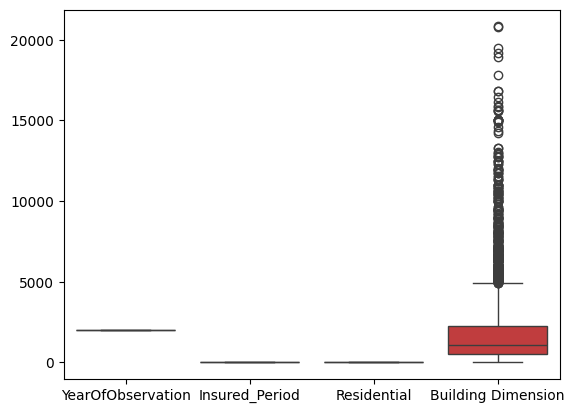

In [245]:
#valeurs tres eloignées

# List of Numerical columns
numerical=list(df_train.select_dtypes(include="number"))
print(numerical)

# Affichage des valeurs tres eloignées
sns.boxplot(data=df_train[numerical])
plt.show()


# **Data Preprocessing (Feature By Feature)**


## Customer Id Feature



In [246]:
# Analyse

print("Nomber of None Values = ",df_train['Customer Id'].isna().sum())
display(df_train["Customer Id"].describe())

print("Nomber of None Values = ",df_test['Customer Id'].isna().sum())
display (df_test["Customer Id"].describe())

Nomber of None Values =  0


,Customer Id
count,5012
unique,5012
top,H18228
freq,1


Nomber of None Values =  0


,Customer Id
count,2147
unique,2147
top,H13879
freq,1


In [247]:
# Reduction de Dimension (Useless Feature)

df_train=df_train.drop(columns=["Customer Id"])
df_test=df_test.drop(columns=["Customer Id"])

# Verification
print(df_train.columns)
print(df_test.columns)

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Geo_Code',
       'Claim'],
      dtype='object')
Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Geo_Code',
       'Claim'],
      dtype='object')


## YearOfObservation


In [248]:
# Analyse

print("Nomber of None Values = ",df_train['YearOfObservation'].isna().sum())
display(df_train["YearOfObservation"].describe())

print("Nomber of None Values = ",df_test['YearOfObservation'].isna().sum())
display (df_test["YearOfObservation"].describe())

Nomber of None Values =  0


,YearOfObservation
count,5012.000000
mean,2013.660215
std,1.383134
min,2012.000000
25%,2012.000000
50%,2013.000000
75%,2015.000000
max,2016.000000


Nomber of None Values =  0


,YearOfObservation
count,2147.000000
mean,2013.691197
std,1.385631
min,2012.000000
25%,2012.000000
50%,2013.000000
75%,2015.000000
max,2016.000000


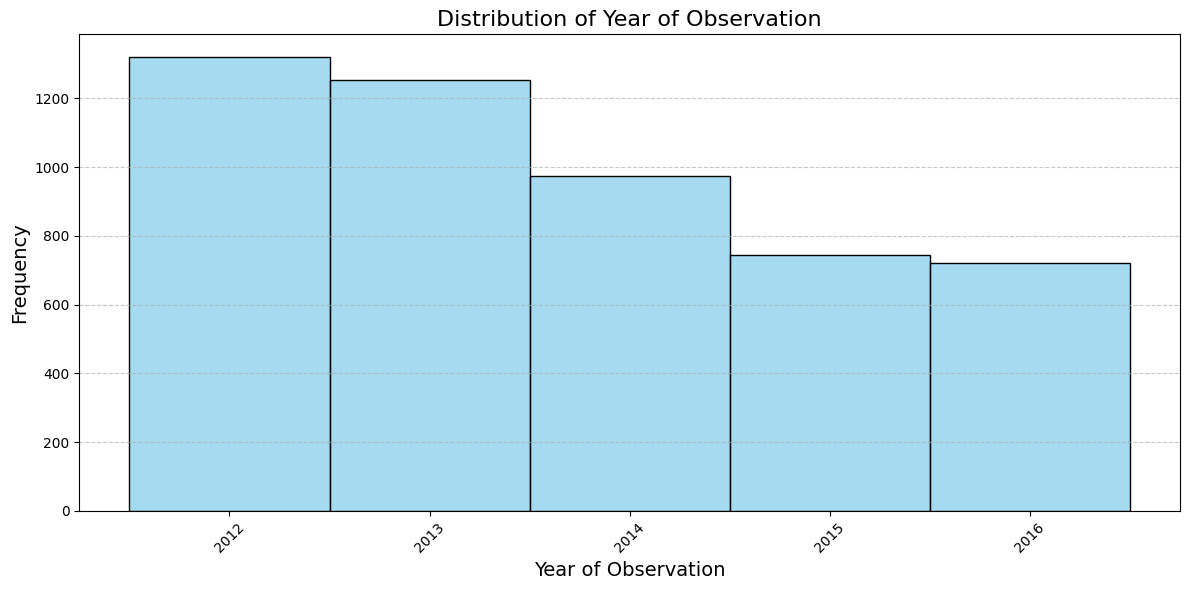

In [249]:
# Visualisation
unique_years = df_train['YearOfObservation'].unique()
num_bins = len(unique_years)

# Plot histogram with integer bins
plt.figure(figsize=(12, 6))
sns.histplot(
    x="YearOfObservation",
    data=df_train,
    bins=num_bins,
    discrete=True,
    kde=False,  # Add a kernel density estimate curve only if it makes sense
    color="skyblue",  # Use a light color for better aesthetics
    edgecolor="black"  # Add edges for better distinction between bins
)

# Force x-axis ticks to be integers
plt.xticks(
    ticks=range(df_train['YearOfObservation'].min(), df_train['YearOfObservation'].max() + 1),
    rotation=45  # Rotate x-axis labels for better readability if years are close
)
plt.title("Distribution of Year of Observation", fontsize=16)
plt.xlabel("Year of Observation", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for visual clarity
plt.tight_layout()  # Ensure layout is not cut off
plt.show()


In [250]:
# Reduction de Dimension (Useless Feature)
df_train=df_train.drop(columns=["YearOfObservation"])
df_test=df_test.drop(columns=["YearOfObservation"])

# Verification
print(df_train.columns)
print(df_test.columns)

Index(['Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced',
       'Garden', 'Settlement', 'Building Dimension', 'Building_Type',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')
Index(['Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced',
       'Garden', 'Settlement', 'Building Dimension', 'Building_Type',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')


## Insured_Period

In [251]:
# Analyse

print("Nomber of None Values = ",df_train['Insured_Period'].isna().sum())
display(df_train["Insured_Period"].describe())

print("Nomber of None Values = ",df_test['Insured_Period'].isna().sum())
display(df_test["Insured_Period"].describe())

Nomber of None Values =  0


,Insured_Period
count,5012.000000
mean,0.869713
std,0.219496
min,0.500000
25%,0.500000
50%,1.000000
75%,1.000000
max,1.000000


Nomber of None Values =  0


,Insured_Period
count,2147.000000
mean,0.876805
std,0.215504
min,0.500000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


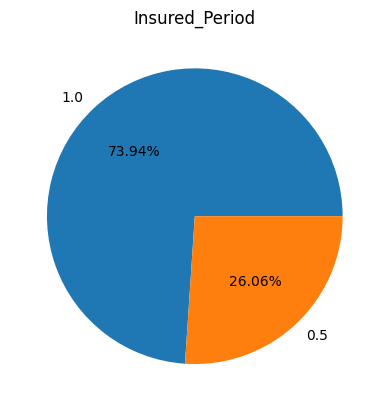

In [252]:
# Visualisation

Insured_Period_counts=df_train['Insured_Period'].value_counts()
labels=list(Insured_Period_counts.index)
df_train['Insured_Period'].value_counts().plot.pie(autopct='%1.2f%%',labels=labels,ylabel="",title='Insured_Period')
plt.show()

## Residential

In [253]:
# Analyse

print("Nomber of None Values = ",df_train['Residential'].isna().sum())
display(df_train["Residential"].describe())

print("Nomber of None Values = ",df_test['Residential'].isna().sum())
display(df_test["Residential"].describe())

Nomber of None Values =  0


,Residential
count,5012.000000
mean,0.301077
std,0.458772
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Nomber of None Values =  0


,Residential
count,2147.000000
mean,0.315789
std,0.464938
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


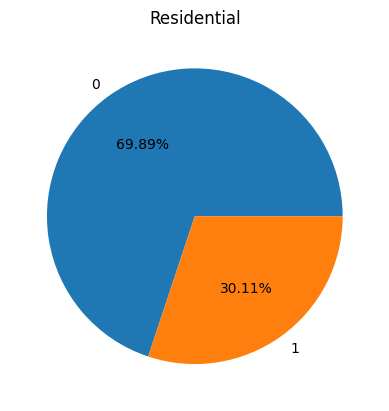

In [254]:
# Visualisation

Residential_counts=df_train['Residential'].value_counts()
labels=list(Residential_counts.index)
df_train['Residential'].value_counts().plot.pie(autopct='%1.2f%%',ylabel="",labels=labels,title='Residential')
plt.show()

## Building_Painted

In [255]:
# Analyse

print("Nomber of None Values = ",df_train['Building_Painted'].isna().sum())
display(df_train["Building_Painted"].describe())

print("Nomber of None Values = ",df_test['Building_Painted'].isna().sum())
display(df_test["Building_Painted"].describe())

Nomber of None Values =  0


,Building_Painted
count,5012
unique,2
top,V
freq,3763


Nomber of None Values =  0


,Building_Painted
count,2147
unique,2
top,V
freq,1619


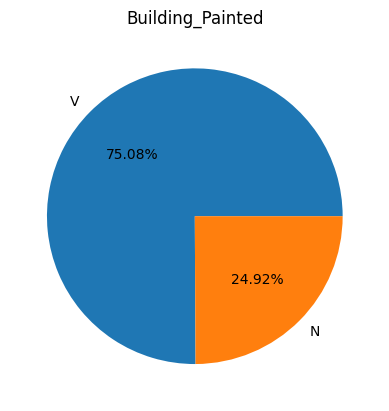

In [256]:
# Visualisation

Building_Painted_counts=df_train['Building_Painted'].value_counts()
labels=list(Building_Painted_counts.index)
df_train['Building_Painted'].value_counts().plot.pie(autopct='%1.2f%%',ylabel="",labels=labels,title='Building_Painted')
plt.show()

In [257]:
# Binary Encoding

#(N : oui, V : non)
df_train ["Building_Painted"].replace({"N":1,"V":0},inplace=True)
df_test ["Building_Painted"].replace({"N":1,"V":0},inplace=True)
#(1 : oui, 0 : non)
display(df_train)
display(df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,V,V,U,1240.0,Wood-framed,without,75117,non
1,1.0,0,1,V,V,U,900.0,Non-combustible,without,62916,non
2,1.0,1,0,N,O,R,4984.0,Non-combustible,4,31149,oui
3,0.5,0,1,V,V,U,600.0,Wood-framed,without,6012,oui
4,1.0,0,1,V,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,V,V,U,550.0,Ordinary,without,33063,oui
5008,0.5,0,0,N,O,R,1000.0,Fire-resistive,4,13004,non
5009,1.0,1,0,N,O,R,480.0,Ordinary,3,94059,non
5010,0.5,0,0,N,O,R,536.0,Fire-resistive,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,1.0,0,0,N,O,R,1452.0,Fire-resistive,5,58194,non
2,1.0,1,0,N,O,R,1944.0,Ordinary,6,92050,oui
3,1.0,0,1,V,V,U,2270.0,Non-combustible,without,13209,oui
4,0.5,0,0,N,O,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,N,O,R,862.0,Wood-framed,2,6159,non
2143,1.0,0,0,V,V,U,NaN,Non-combustible,without,NaN,non
2144,1.0,0,0,N,O,R,730.0,Non-combustible,3,69027,non
2145,1.0,1,1,V,V,U,568.0,Non-combustible,without,69091,oui


## Building_Fenced

In [258]:
# Analyse

print("Nomber of None Values = ",df_train['Building_Fenced'].isna().sum())
display(df_train["Building_Fenced"].describe())

print("Nomber of None Values = ",df_test['Building_Fenced'].isna().sum())
display(df_test["Building_Fenced"].describe())

Nomber of None Values =  0


,Building_Fenced
count,5012
unique,2
top,N
freq,2535


Nomber of None Values =  0


,Building_Fenced
count,2147
unique,2
top,V
freq,1074


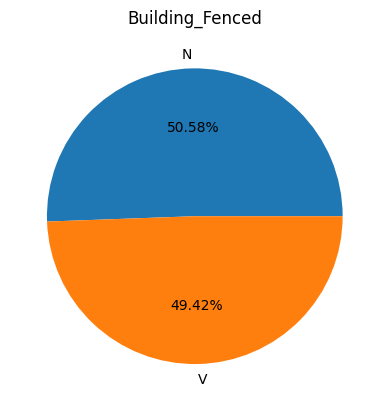

In [259]:
# Visualisation

Building_Fenced_counts=df_train['Building_Fenced'].value_counts()
labels=list(Building_Fenced_counts.index)
df_train['Building_Fenced'].value_counts().plot.pie(autopct='%1.2f%%',ylabel="",labels=labels,title='Building_Fenced')
plt.show()

In [260]:
# Binary Encoding

#(N : oui, V : non)
df_train ["Building_Fenced"].replace({"N":1,"V":0},inplace=True)
df_test ["Building_Fenced"].replace({"N":1,"V":0},inplace=True)
#(1 : oui, 0 : non)
display(df_train)
display(df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,0,V,U,1240.0,Wood-framed,without,75117,non
1,1.0,0,1,0,V,U,900.0,Non-combustible,without,62916,non
2,1.0,1,0,1,O,R,4984.0,Non-combustible,4,31149,oui
3,0.5,0,1,0,V,U,600.0,Wood-framed,without,6012,oui
4,1.0,0,1,0,V,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,V,U,550.0,Ordinary,without,33063,oui
5008,0.5,0,0,1,O,R,1000.0,Fire-resistive,4,13004,non
5009,1.0,1,0,1,O,R,480.0,Ordinary,3,94059,non
5010,0.5,0,0,1,O,R,536.0,Fire-resistive,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,0,V,U,3760.0,Fire-resistive,without,43157,oui
1,1.0,0,0,1,O,R,1452.0,Fire-resistive,5,58194,non
2,1.0,1,0,1,O,R,1944.0,Ordinary,6,92050,oui
3,1.0,0,1,0,V,U,2270.0,Non-combustible,without,13209,oui
4,0.5,0,0,1,O,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,O,R,862.0,Wood-framed,2,6159,non
2143,1.0,0,0,0,V,U,NaN,Non-combustible,without,NaN,non
2144,1.0,0,0,1,O,R,730.0,Non-combustible,3,69027,non
2145,1.0,1,1,0,V,U,568.0,Non-combustible,without,69091,oui


## Garden

In [261]:
# Analyse

print("Nomber of None Values = ",df_train['Garden'].isna().sum())
display(df_train["Garden"].describe())

print("Nomber of None Values = ",df_test['Garden'].isna().sum())
display(df_test["Garden"].describe())

Nomber of None Values =  4


,Garden
count,5008
unique,2
top,O
freq,2532


Nomber of None Values =  3


,Garden
count,2144
unique,2
top,V
freq,1074


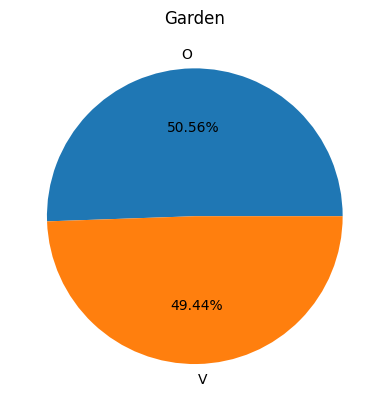

In [262]:
# Visualisation

Garden_counts=df_train['Garden'].value_counts()
labels=list(Garden_counts.index)
df_train['Garden'].value_counts().plot.pie(autopct='%1.2f%%',ylabel="",labels=labels,title='Garden')
plt.show()

In [263]:
# Binary Encoding

#(V : oui, O : non)
df_train ["Garden"].replace({"V":1,"O":0},inplace=True)
df_test ["Garden"].replace({"V":1,"O":0},inplace=True)
#(1 : oui, 0 : non)

display(df_train)
display(df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,0,1.0,U,1240.0,Wood-framed,without,75117,non
1,1.0,0,1,0,1.0,U,900.0,Non-combustible,without,62916,non
2,1.0,1,0,1,0.0,R,4984.0,Non-combustible,4,31149,oui
3,0.5,0,1,0,1.0,U,600.0,Wood-framed,without,6012,oui
4,1.0,0,1,0,1.0,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1.0,U,550.0,Ordinary,without,33063,oui
5008,0.5,0,0,1,0.0,R,1000.0,Fire-resistive,4,13004,non
5009,1.0,1,0,1,0.0,R,480.0,Ordinary,3,94059,non
5010,0.5,0,0,1,0.0,R,536.0,Fire-resistive,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,0,1.0,U,3760.0,Fire-resistive,without,43157,oui
1,1.0,0,0,1,0.0,R,1452.0,Fire-resistive,5,58194,non
2,1.0,1,0,1,0.0,R,1944.0,Ordinary,6,92050,oui
3,1.0,0,1,0,1.0,U,2270.0,Non-combustible,without,13209,oui
4,0.5,0,0,1,0.0,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0.0,R,862.0,Wood-framed,2,6159,non
2143,1.0,0,0,0,1.0,U,NaN,Non-combustible,without,NaN,non
2144,1.0,0,0,1,0.0,R,730.0,Non-combustible,3,69027,non
2145,1.0,1,1,0,1.0,U,568.0,Non-combustible,without,69091,oui


In [264]:
# traitement des valeur manquantes

df_train.dropna(subset=["Garden"], inplace=True)
display ( df_train)

df_test.dropna(subset=["Garden"], inplace=True)
display ( df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,0,1.0,U,1240.0,Wood-framed,without,75117,non
1,1.0,0,1,0,1.0,U,900.0,Non-combustible,without,62916,non
2,1.0,1,0,1,0.0,R,4984.0,Non-combustible,4,31149,oui
3,0.5,0,1,0,1.0,U,600.0,Wood-framed,without,6012,oui
4,1.0,0,1,0,1.0,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1.0,U,550.0,Ordinary,without,33063,oui
5008,0.5,0,0,1,0.0,R,1000.0,Fire-resistive,4,13004,non
5009,1.0,1,0,1,0.0,R,480.0,Ordinary,3,94059,non
5010,0.5,0,0,1,0.0,R,536.0,Fire-resistive,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,0,1.0,U,3760.0,Fire-resistive,without,43157,oui
1,1.0,0,0,1,0.0,R,1452.0,Fire-resistive,5,58194,non
2,1.0,1,0,1,0.0,R,1944.0,Ordinary,6,92050,oui
3,1.0,0,1,0,1.0,U,2270.0,Non-combustible,without,13209,oui
4,0.5,0,0,1,0.0,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0.0,R,862.0,Wood-framed,2,6159,non
2143,1.0,0,0,0,1.0,U,NaN,Non-combustible,without,NaN,non
2144,1.0,0,0,1,0.0,R,730.0,Non-combustible,3,69027,non
2145,1.0,1,1,0,1.0,U,568.0,Non-combustible,without,69091,oui


In [265]:
#Astype

df_train ["Garden"] = df_train["Garden"].astype('int64')
df_test ["Garden"] = df_test["Garden"].astype('int64')

display(df_train)
display(df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,0,1,U,1240.0,Wood-framed,without,75117,non
1,1.0,0,1,0,1,U,900.0,Non-combustible,without,62916,non
2,1.0,1,0,1,0,R,4984.0,Non-combustible,4,31149,oui
3,0.5,0,1,0,1,U,600.0,Wood-framed,without,6012,oui
4,1.0,0,1,0,1,U,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1,U,550.0,Ordinary,without,33063,oui
5008,0.5,0,0,1,0,R,1000.0,Fire-resistive,4,13004,non
5009,1.0,1,0,1,0,R,480.0,Ordinary,3,94059,non
5010,0.5,0,0,1,0,R,536.0,Fire-resistive,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,0,1,U,3760.0,Fire-resistive,without,43157,oui
1,1.0,0,0,1,0,R,1452.0,Fire-resistive,5,58194,non
2,1.0,1,0,1,0,R,1944.0,Ordinary,6,92050,oui
3,1.0,0,1,0,1,U,2270.0,Non-combustible,without,13209,oui
4,0.5,0,0,1,0,R,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0,R,862.0,Wood-framed,2,6159,non
2143,1.0,0,0,0,1,U,NaN,Non-combustible,without,NaN,non
2144,1.0,0,0,1,0,R,730.0,Non-combustible,3,69027,non
2145,1.0,1,1,0,1,U,568.0,Non-combustible,without,69091,oui


## Settlement ( urbain_zone )

In [266]:
# Analyse

print("Nomber of None Values = ",df_train['Settlement'].isna().sum())
display (df_train["Settlement"].describe())

print("Nomber of None Values = ",df_test['Settlement'].isna().sum())
display (df_test["Settlement"].describe())

Nomber of None Values =  0


,Settlement
count,5008
unique,2
top,R
freq,2533


Nomber of None Values =  0


,Settlement
count,2144
unique,2
top,U
freq,1074


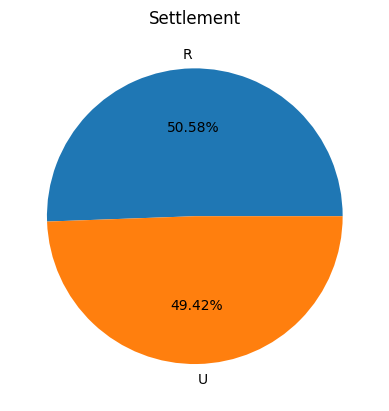

In [267]:
# Visualisation
Settlement_counts=df_train['Settlement'].value_counts()
labels=list(Settlement_counts.index)
df_train['Settlement'].value_counts().plot.pie(autopct='%1.2f%%',ylabel="",labels=labels,title='Settlement')
plt.show()

In [268]:
# Binary Encoding

#(R : zone rurale, U : zone urbain)
df_train ["Settlement"].replace({"U":1,"R":0},inplace=True)
df_test ["Settlement"].replace({"U":1,"R":0},inplace=True)
#(1 : zone urbain , 0 : zone rurale)
df_train = df_train.rename(columns={'Settlement': 'urbain_zone'})
df_test = df_test.rename(columns={'Settlement': 'urbain_zone'})
display(df_train)
display(df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,0,1,1,1240.0,Wood-framed,without,75117,non
1,1.0,0,1,0,1,1,900.0,Non-combustible,without,62916,non
2,1.0,1,0,1,0,0,4984.0,Non-combustible,4,31149,oui
3,0.5,0,1,0,1,1,600.0,Wood-framed,without,6012,oui
4,1.0,0,1,0,1,1,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1,1,550.0,Ordinary,without,33063,oui
5008,0.5,0,0,1,0,0,1000.0,Fire-resistive,4,13004,non
5009,1.0,1,0,1,0,0,480.0,Ordinary,3,94059,non
5010,0.5,0,0,1,0,0,536.0,Fire-resistive,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,0,1,1,3760.0,Fire-resistive,without,43157,oui
1,1.0,0,0,1,0,0,1452.0,Fire-resistive,5,58194,non
2,1.0,1,0,1,0,0,1944.0,Ordinary,6,92050,oui
3,1.0,0,1,0,1,1,2270.0,Non-combustible,without,13209,oui
4,0.5,0,0,1,0,0,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0,0,862.0,Wood-framed,2,6159,non
2143,1.0,0,0,0,1,1,NaN,Non-combustible,without,NaN,non
2144,1.0,0,0,1,0,0,730.0,Non-combustible,3,69027,non
2145,1.0,1,1,0,1,1,568.0,Non-combustible,without,69091,oui


## Building Dimension

In [269]:
# Analyse

print("Nomber of None Values = ",df_train['Building Dimension'].isna().sum())
display (df_train["Building Dimension"].describe())

print("Nomber of None Values = ",df_test['Building Dimension'].isna().sum())
display (df_test["Building Dimension"].describe())

Nomber of None Values =  77


,Building Dimension
count,4931.000000
mean,1876.147232
std,2267.016703
min,1.000000
25%,520.000000
50%,1067.000000
75%,2280.000000
max,20840.000000


Nomber of None Values =  29


,Building Dimension
count,2115.000000
mean,1896.437352
std,2301.002647
min,10.000000
25%,536.000000
50%,1100.000000
75%,2296.000000
max,20940.000000


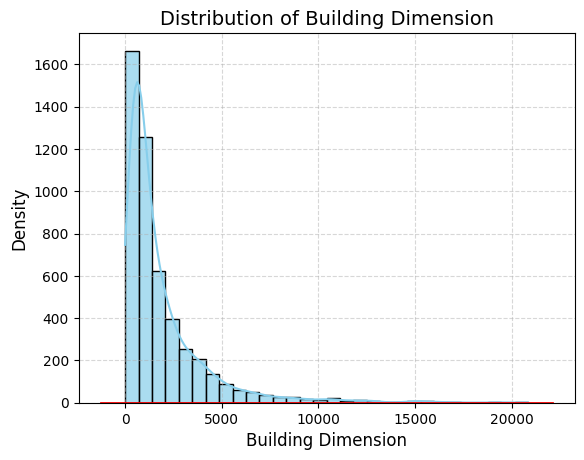

In [270]:
# Visualisation

sns.histplot(df_train['Building Dimension'], kde=True, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
sns.kdeplot(df_train['Building Dimension'], bw_method='scott', bw_adjust=1, color='red', linewidth=2)
plt.title("Distribution of Building Dimension", fontsize=14)
plt.xlabel("Building Dimension", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [271]:
# traitement des valeur manquantes

df_train = traitement_des_valeurs_manquantes(df_train,'Building Dimension')
display ( df_train)

df_test = traitement_des_valeurs_manquantes(df_test,'Building Dimension')
display ( df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,0,1,1,1240.0,Wood-framed,without,75117,non
1,1.0,0,1,0,1,1,900.0,Non-combustible,without,62916,non
2,1.0,1,0,1,0,0,4984.0,Non-combustible,4,31149,oui
3,0.5,0,1,0,1,1,600.0,Wood-framed,without,6012,oui
4,1.0,0,1,0,1,1,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1,1,550.0,Ordinary,without,33063,oui
5008,0.5,0,0,1,0,0,1000.0,Fire-resistive,4,13004,non
5009,1.0,1,0,1,0,0,480.0,Ordinary,3,94059,non
5010,0.5,0,0,1,0,0,536.0,Fire-resistive,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,0,1,1,3760.0,Fire-resistive,without,43157,oui
1,1.0,0,0,1,0,0,1452.0,Fire-resistive,5,58194,non
2,1.0,1,0,1,0,0,1944.0,Ordinary,6,92050,oui
3,1.0,0,1,0,1,1,2270.0,Non-combustible,without,13209,oui
4,0.5,0,0,1,0,0,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0,0,862.0,Wood-framed,2,6159,non
2143,1.0,0,0,0,1,1,400.0,Non-combustible,without,NaN,non
2144,1.0,0,0,1,0,0,730.0,Non-combustible,3,69027,non
2145,1.0,1,1,0,1,1,568.0,Non-combustible,without,69091,oui


In [272]:
# outliers

df_train=treatment_des_outliers(df_train,"Building Dimension")
display ( df_train)

df_test=treatment_des_outliers(df_test,"Building Dimension")
display ( df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,0,1,1,1240.0,Wood-framed,without,75117,non
1,1.0,0,1,0,1,1,900.0,Non-combustible,without,62916,non
2,1.0,1,0,1,0,0,4875.0,Non-combustible,4,31149,oui
3,0.5,0,1,0,1,1,600.0,Wood-framed,without,6012,oui
4,1.0,0,1,0,1,1,900.0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1,1,550.0,Ordinary,without,33063,oui
5008,0.5,0,0,1,0,0,1000.0,Fire-resistive,4,13004,non
5009,1.0,1,0,1,0,0,480.0,Ordinary,3,94059,non
5010,0.5,0,0,1,0,0,536.0,Fire-resistive,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,0,1,1,3760.0,Fire-resistive,without,43157,oui
1,1.0,0,0,1,0,0,1452.0,Fire-resistive,5,58194,non
2,1.0,1,0,1,0,0,1944.0,Ordinary,6,92050,oui
3,1.0,0,1,0,1,1,2270.0,Non-combustible,without,13209,oui
4,0.5,0,0,1,0,0,2976.0,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0,0,862.0,Wood-framed,2,6159,non
2143,1.0,0,0,0,1,1,400.0,Non-combustible,without,NaN,non
2144,1.0,0,0,1,0,0,730.0,Non-combustible,3,69027,non
2145,1.0,1,1,0,1,1,568.0,Non-combustible,without,69091,oui


Nomber of None Values =  0


,Building Dimension
count,5008.000000
mean,1611.475040
std,1428.627826
min,101.000000
25%,500.000000
50%,1037.500000
75%,2250.000000
max,4875.000000


Nomber of None Values =  0


,Building Dimension
count,2144.000000
mean,1630.354594
std,1426.733205
min,110.000000
25%,514.500000
50%,1069.000000
75%,2263.250000
max,4886.375000


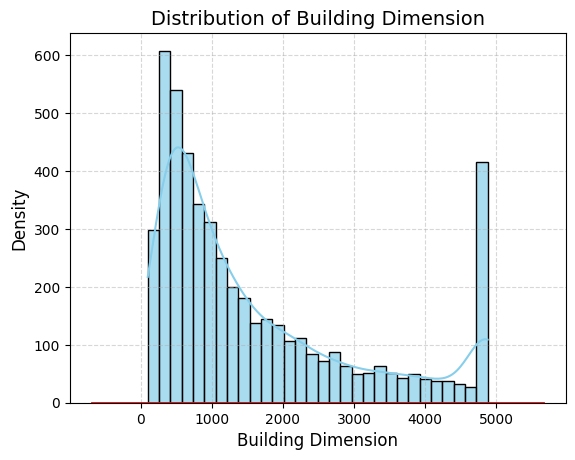

In [273]:
# Verification

print("Nomber of None Values = ",df_train['Building Dimension'].isna().sum())
display (df_train["Building Dimension"].describe())
print("Nomber of None Values = ",df_test['Building Dimension'].isna().sum())
display (df_test["Building Dimension"].describe())

sns.histplot(df_train['Building Dimension'], kde=True, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
sns.kdeplot(df_train['Building Dimension'], bw_method='scott', bw_adjust=1, color='red', linewidth=2)
plt.title("Distribution of Building Dimension", fontsize=14)
plt.xlabel("Building Dimension", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [274]:
# Binary Encoding

#Summary of the central tendency, dispersion, and shape of a dataset's distribution.
print(df_train["Building Dimension"].describe())
#The 33th percentile (first Tertiles)
Q1 = df_train['Building Dimension'].quantile(0.33)
#The 66th percentile (Second Tertiles)
Q2 = df_train['Building Dimension'].quantile(0.66)
print (Q1,Q2)

df_train["Small_Building"]=np.where(df_train['Building Dimension']<=Q1 , 1 , 0)
df_train["Medium_Building"]=np.where((df_train['Building Dimension']>=Q1 )&(df_train['Building Dimension']<=Q2), 1 , 0)
df_train["Large_Building"]=np.where(df_train['Building Dimension']>=Q2 , 1 , 0)
df_train=df_train.iloc[:, [0,1,2,3,4,5,11,12,13,7,8,9,10,]]
display (df_train)

df_test["Small_Building"]=np.where(df_test['Building Dimension']<=Q1 , 1 , 0)
df_test["Medium_Building"]=np.where((df_test['Building Dimension']>=Q1 )&(df_test['Building Dimension']<=Q2), 1 , 0)
df_test["Large_Building"]=np.where(df_test['Building Dimension']>=Q2 , 1 , 0)
df_test=df_test.iloc[:, [0,1,2,3,4,5,11,12,13,7,8,9,10,]]
display (df_test)

count    5008.000000
mean     1611.475040
std      1428.627826
min       101.000000
25%       500.000000
50%      1037.500000
75%      2250.000000
max      4875.000000
Name: Building Dimension, dtype: float64
650.0 1699.2400000000007


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,0,1,1,0,1,0,Wood-framed,without,75117,non
1,1.0,0,1,0,1,1,0,1,0,Non-combustible,without,62916,non
2,1.0,1,0,1,0,0,0,0,1,Non-combustible,4,31149,oui
3,0.5,0,1,0,1,1,1,0,0,Wood-framed,without,6012,oui
4,1.0,0,1,0,1,1,0,1,0,Non-combustible,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1,1,1,0,0,Ordinary,without,33063,oui
5008,0.5,0,0,1,0,0,0,1,0,Fire-resistive,4,13004,non
5009,1.0,1,0,1,0,0,1,0,0,Ordinary,3,94059,non
5010,0.5,0,0,1,0,0,1,0,0,Fire-resistive,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,0,1,1,0,0,1,Fire-resistive,without,43157,oui
1,1.0,0,0,1,0,0,0,1,0,Fire-resistive,5,58194,non
2,1.0,1,0,1,0,0,0,0,1,Ordinary,6,92050,oui
3,1.0,0,1,0,1,1,0,0,1,Non-combustible,without,13209,oui
4,0.5,0,0,1,0,0,0,0,1,Fire-resistive,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0,0,0,1,0,Wood-framed,2,6159,non
2143,1.0,0,0,0,1,1,1,0,0,Non-combustible,without,NaN,non
2144,1.0,0,0,1,0,0,0,1,0,Non-combustible,3,69027,non
2145,1.0,1,1,0,1,1,1,0,0,Non-combustible,without,69091,oui


## Building_Type

In [275]:
# Analyse

print("Nomber of None Values = ",df_train['Building_Type'].isna().sum())
display (df_train["Building_Type"].describe())

print("Nomber of None Values = ",df_test['Building_Type'].isna().sum())
display (df_test["Building_Type"].describe())

Nomber of None Values =  0


,Building_Type
count,5008
unique,4
top,Non-combustible
freq,2310


Nomber of None Values =  0


,Building_Type
count,2144
unique,4
top,Non-combustible
freq,995


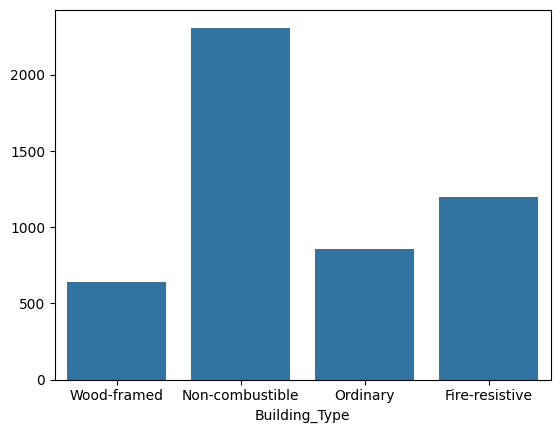

In [276]:
# Visualisation

sns.countplot(x="Building_Type", data=df_train)
plt.ylabel("")
plt.show()

In [277]:
# Binary Encoding

df_train=pd.get_dummies(df_train, columns=["Building_Type"],prefix="Building_Type", prefix_sep="_", dtype="int64")
df_train=df_train.iloc[:, [0,1,2,3,4,5,6,7,8,12,13,14,15,9,10,11]]
display (df_train)

df_test=pd.get_dummies(df_test, columns=["Building_Type"],prefix="Building_Type", prefix_sep="_", dtype="int64")
df_test=df_test.iloc[:, [0,1,2,3,4,5,6,7,8,12,13,14,15,9,10,11]]
display (df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,0,1,1,0,1,0,0,0,0,1,without,75117,non
1,1.0,0,1,0,1,1,0,1,0,0,1,0,0,without,62916,non
2,1.0,1,0,1,0,0,0,0,1,0,1,0,0,4,31149,oui
3,0.5,0,1,0,1,1,1,0,0,0,0,0,1,without,6012,oui
4,1.0,0,1,0,1,1,0,1,0,0,1,0,0,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1,1,1,0,0,0,0,1,0,without,33063,oui
5008,0.5,0,0,1,0,0,0,1,0,1,0,0,0,4,13004,non
5009,1.0,1,0,1,0,0,1,0,0,0,0,1,0,3,94059,non
5010,0.5,0,0,1,0,0,1,0,0,1,0,0,0,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,0,1,1,0,0,1,1,0,0,0,without,43157,oui
1,1.0,0,0,1,0,0,0,1,0,1,0,0,0,5,58194,non
2,1.0,1,0,1,0,0,0,0,1,0,0,1,0,6,92050,oui
3,1.0,0,1,0,1,1,0,0,1,0,1,0,0,without,13209,oui
4,0.5,0,0,1,0,0,0,0,1,1,0,0,0,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0,0,0,1,0,0,0,0,1,2,6159,non
2143,1.0,0,0,0,1,1,1,0,0,0,1,0,0,without,NaN,non
2144,1.0,0,0,1,0,0,0,1,0,0,1,0,0,3,69027,non
2145,1.0,1,1,0,1,1,1,0,0,0,1,0,0,without,69091,oui


## NumberOfWindows

In [278]:
# Analyse

print("Nomber of None Values = ",df_train['NumberOfWindows'].isna().sum())
display(df_train["NumberOfWindows"].describe())

print("Nomber of None Values = ",df_test['NumberOfWindows'].isna().sum())
display(df_test["NumberOfWindows"].describe())

Nomber of None Values =  0


,NumberOfWindows
count,5008
unique,11
top,without
freq,2476


Nomber of None Values =  0


,NumberOfWindows
count,2144
unique,11
top,without
freq,1074


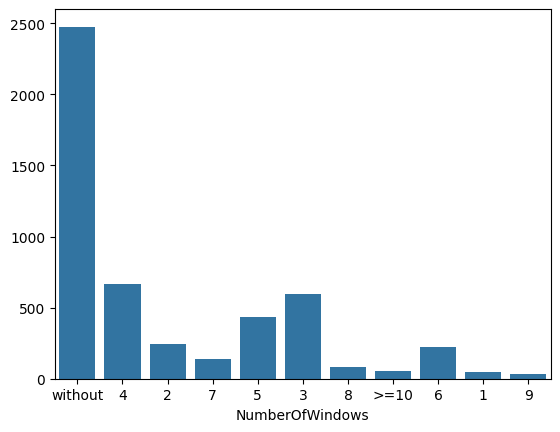

In [279]:
# Visualisation

sns.countplot(x="NumberOfWindows", data=df_train)
plt.ylabel("")
plt.show()

In [280]:
# Outliers

df_train["NumberOfWindows"].replace({'>=10':10},inplace=True)
display ( df_train)

df_test["NumberOfWindows"].replace({'>=10':10},inplace=True)
display ( df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,0,1,1,0,1,0,0,0,0,1,without,75117,non
1,1.0,0,1,0,1,1,0,1,0,0,1,0,0,without,62916,non
2,1.0,1,0,1,0,0,0,0,1,0,1,0,0,4,31149,oui
3,0.5,0,1,0,1,1,1,0,0,0,0,0,1,without,6012,oui
4,1.0,0,1,0,1,1,0,1,0,0,1,0,0,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1,1,1,0,0,0,0,1,0,without,33063,oui
5008,0.5,0,0,1,0,0,0,1,0,1,0,0,0,4,13004,non
5009,1.0,1,0,1,0,0,1,0,0,0,0,1,0,3,94059,non
5010,0.5,0,0,1,0,0,1,0,0,1,0,0,0,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,0,1,1,0,0,1,1,0,0,0,without,43157,oui
1,1.0,0,0,1,0,0,0,1,0,1,0,0,0,5,58194,non
2,1.0,1,0,1,0,0,0,0,1,0,0,1,0,6,92050,oui
3,1.0,0,1,0,1,1,0,0,1,0,1,0,0,without,13209,oui
4,0.5,0,0,1,0,0,0,0,1,1,0,0,0,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0,0,0,1,0,0,0,0,1,2,6159,non
2143,1.0,0,0,0,1,1,1,0,0,0,1,0,0,without,NaN,non
2144,1.0,0,0,1,0,0,0,1,0,0,1,0,0,3,69027,non
2145,1.0,1,1,0,1,1,1,0,0,0,1,0,0,without,69091,oui


In [281]:
# Binary Encoding

#(without dans le cas de 0 fenêtre)
df_train["NumberOfWindows"].replace({"without":0},inplace=True)
df_train['NumberOfWindows'] = pd.to_numeric(df_train['NumberOfWindows']).astype('int64')
#(0 dans le cas de 0 fenêtre)
display (df_train)

#(without dans le cas de 0 fenêtre)
df_test["NumberOfWindows"].replace({"without":0},inplace=True)
df_test['NumberOfWindows'] = pd.to_numeric(df_test['NumberOfWindows']).astype('int64')
#(0 dans le cas de 0 fenêtre)
display (df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,0,1,1,0,1,0,0,0,0,1,0,75117,non
1,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,62916,non
2,1.0,1,0,1,0,0,0,0,1,0,1,0,0,4,31149,oui
3,0.5,0,1,0,1,1,1,0,0,0,0,0,1,0,6012,oui
4,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1,1,1,0,0,0,0,1,0,0,33063,oui
5008,0.5,0,0,1,0,0,0,1,0,1,0,0,0,4,13004,non
5009,1.0,1,0,1,0,0,1,0,0,0,0,1,0,3,94059,non
5010,0.5,0,0,1,0,0,1,0,0,1,0,0,0,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,0,1,1,0,0,1,1,0,0,0,0,43157,oui
1,1.0,0,0,1,0,0,0,1,0,1,0,0,0,5,58194,non
2,1.0,1,0,1,0,0,0,0,1,0,0,1,0,6,92050,oui
3,1.0,0,1,0,1,1,0,0,1,0,1,0,0,0,13209,oui
4,0.5,0,0,1,0,0,0,0,1,1,0,0,0,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0,0,0,1,0,0,0,0,1,2,6159,non
2143,1.0,0,0,0,1,1,1,0,0,0,1,0,0,0,NaN,non
2144,1.0,0,0,1,0,0,0,1,0,0,1,0,0,3,69027,non
2145,1.0,1,1,0,1,1,1,0,0,0,1,0,0,0,69091,oui


Nomber of None Values =  0


,NumberOfWindows
count,5008.000000
mean,2.202676
std,2.535834
min,0.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,10.000000


Nomber of None Values =  0


,NumberOfWindows
count,2144.000000
mean,2.134795
std,2.480540
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,10.000000


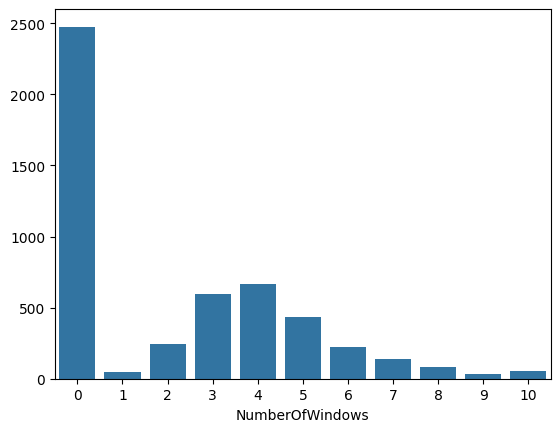

In [282]:
# verification

print("Nomber of None Values = ",df_train['NumberOfWindows'].isna().sum())
display(df_train["NumberOfWindows"].describe())
print("Nomber of None Values = ",df_test['NumberOfWindows'].isna().sum())
display(df_test["NumberOfWindows"].describe())

sns.countplot(x="NumberOfWindows", data=df_train)
plt.ylabel("")
plt.show()

## Geo_Code

In [283]:
# Analyse

print("Nomber of None Values = ",df_train['Geo_Code'].isna().sum())
display(df_train["Geo_Code"].describe())

print("Nomber of None Values = ",df_test['Geo_Code'].isna().sum())
display(df_test["Geo_Code"].describe())

Nomber of None Values =  73


,Geo_Code
count,4935
unique,1115
top,6088
freq,102


Nomber of None Values =  29


,Geo_Code
count,2115
unique,713
top,6088
freq,41


In [284]:
# Visualisation


In [285]:
# Remove Nan values

#most_frequent
df_train['Geo_Code'].ffill(inplace=True)
display(df_train)

df_test['Geo_Code'].ffill(inplace=True)
display(df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,Geo_Code,Claim
0,1.0,1,1,0,1,1,0,1,0,0,0,0,1,0,75117,non
1,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,62916,non
2,1.0,1,0,1,0,0,0,0,1,0,1,0,0,4,31149,oui
3,0.5,0,1,0,1,1,1,0,0,0,0,0,1,0,6012,oui
4,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1,1,1,0,0,0,0,1,0,0,33063,oui
5008,0.5,0,0,1,0,0,0,1,0,1,0,0,0,4,13004,non
5009,1.0,1,0,1,0,0,1,0,0,0,0,1,0,3,94059,non
5010,0.5,0,0,1,0,0,1,0,0,1,0,0,0,4,74243,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,Geo_Code,Claim
0,1.0,0,0,0,1,1,0,0,1,1,0,0,0,0,43157,oui
1,1.0,0,0,1,0,0,0,1,0,1,0,0,0,5,58194,non
2,1.0,1,0,1,0,0,0,0,1,0,0,1,0,6,92050,oui
3,1.0,0,1,0,1,1,0,0,1,0,1,0,0,0,13209,oui
4,0.5,0,0,1,0,0,0,0,1,1,0,0,0,9,5177,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0,0,0,1,0,0,0,0,1,2,6159,non
2143,1.0,0,0,0,1,1,1,0,0,0,1,0,0,0,6159,non
2144,1.0,0,0,1,0,0,0,1,0,0,1,0,0,3,69027,non
2145,1.0,1,1,0,1,1,1,0,0,0,1,0,0,0,69091,oui


In [286]:
# Importation d'une DS Extern

#https://simplemaps.com/data/us-zips

zipcode_data = pd.read_csv(
    '/content/uszips.csv',
    on_bad_lines='warn'  # Shows a warning for bad lines but continues
)[['state_id', 'zip', 'density']]

zipcode_data.dropna(subset=['density'], inplace=True)
print(zipcode_data.head(100))

    state_id  zip  density
0         PR  601    100.2
1         PR  602    477.6
2         PR  603    543.1
3         PR  606     47.3
4         PR  610    264.4
..       ...  ...      ...
101       PR  911   6028.4
102       PR  912   6474.9
103       PR  913   7984.8
104       PR  915   6743.9
105       PR  917   5151.5

[100 rows x 3 columns]


In [287]:
# Creation d'une DF Extern

state_density_df = zipcode_data.groupby('state_id').agg(
    zip_start=('zip', 'min'),
    zip_end=('zip', 'max'),
    new_density=('density', 'mean')
).reset_index()
state_density_df = state_density_df.sort_values(by='zip_start').reset_index(drop=True)
print(state_density_df)

   state_id  zip_start  zip_end  new_density
0        PR        601      987  1105.897710
1        MA       1001     2791  1218.233581
2        RI       2802     2921  1148.051852
3        NH       3031     3897   123.766802
4        ME       3901     4992    67.660798
5        VT       5001     5907    90.939623
6        CT       6001     6907   646.406597
7        NY       6390    14905  2141.604605
8        NJ       7001     8904  1532.152843
9        PA      15001    19611   533.255950
10       DE      19701    19980   564.182353
11       DC      20001    20591  3083.259649
12       VA      20105    24657   378.867996
13       MD      20601    21930   617.602516
14       WV      24701    26886    76.365718
15       NC      27006    28909   240.443611
16       SC      29001    29945   264.124292
17       GA      30002    39897   320.006933
18       FL      32003    34997   831.325519
19       AL      35004    36925   190.644512
20       TN      37010    38589   208.791667
21       M

In [288]:
# Creation des nouveaux Features

# Function to find state and density
def find_state_density(geo_code, state_density_df):
    if pd.isna(geo_code):
        return pd.Series([None, None])  # Return None for missing Geo_Code
    # Ensure the Geo_Code is numeric
    try:
        geo_code = int(geo_code)
    except ValueError:
        # Return None if Geo_Code is not numeric
        return pd.Series([None, None])
    # Filter the dataframe to find the matching row
    row = state_density_df[
        (state_density_df['zip_start'] <= geo_code) &
        (state_density_df['zip_end'] >= geo_code)
    ]
    if not row.empty:
        return pd.Series([row.iloc[0]['state_id'], row.iloc[0]['new_density']])
    else:
        return pd.Series([None, None])

if 'Geo_Code' in df_train.columns:
  # Apply the function to each Geo_Code
  df_train[['State', 'City_Density']] = df_train['Geo_Code'].apply(
      lambda x: find_state_density(x, state_density_df)
  )


if 'Geo_Code' in df_test.columns:
  # Apply the function to each Geo_Code
  df_test[['State', 'City_Density']] = df_test['Geo_Code'].apply(
      lambda x: find_state_density(x, state_density_df)
  )

df_train=df_train.drop(columns=["Geo_Code"])
df_test=df_test.drop(columns=["Geo_Code"])

display (df_train)
display (df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,Claim,State,City_Density
0,1.0,1,1,0,1,1,0,1,0,0,0,0,1,0,non,TX,466.607387
1,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,non,IL,544.584670
2,1.0,1,0,1,0,0,0,0,1,0,1,0,0,4,oui,GA,320.006933
3,0.5,0,1,0,1,1,1,0,0,0,0,0,1,0,oui,CT,646.406597
4,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,non,SD,39.168800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1,1,1,0,0,0,0,1,0,0,oui,GA,320.006933
5008,0.5,0,0,1,0,0,0,1,0,1,0,0,0,4,non,NY,2141.604605
5009,1.0,1,0,1,0,0,1,0,0,0,0,1,0,3,non,CA,1306.829079
5010,0.5,0,0,1,0,0,1,0,0,1,0,0,0,4,non,OK,140.720934


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,Claim,State,City_Density
0,1.0,0,0,0,1,1,0,0,1,1,0,0,0,0,oui,OH,374.595377
1,1.0,0,0,1,0,0,0,1,0,1,0,0,0,5,non,ND,52.396649
2,1.0,1,0,1,0,0,0,0,1,0,0,1,0,6,oui,CA,1306.829079
3,1.0,0,1,0,1,1,0,0,1,0,1,0,0,0,oui,NY,2141.604605
4,0.5,0,0,1,0,0,0,0,1,1,0,0,0,9,non,VT,90.939623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0,0,0,1,0,0,0,0,1,2,non,CT,646.406597
2143,1.0,0,0,0,1,1,1,0,0,0,1,0,0,0,non,CT,646.406597
2144,1.0,0,0,1,0,0,0,1,0,0,1,0,0,3,non,NE,126.082765
2145,1.0,1,1,0,1,1,1,0,0,0,1,0,0,0,oui,NE,126.082765


In [289]:
#ordre des colunm

df_train=df_train.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,14]]
display (df_train)
df_test=df_test.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,14]]
display (df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,State,City_Density,Claim
0,1.0,1,1,0,1,1,0,1,0,0,0,0,1,0,TX,466.607387,non
1,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,IL,544.584670,non
2,1.0,1,0,1,0,0,0,0,1,0,1,0,0,4,GA,320.006933,oui
3,0.5,0,1,0,1,1,1,0,0,0,0,0,1,0,CT,646.406597,oui
4,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,SD,39.168800,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,1.0,0,1,0,1,1,1,0,0,0,0,1,0,0,GA,320.006933,oui
5008,0.5,0,0,1,0,0,0,1,0,1,0,0,0,4,NY,2141.604605,non
5009,1.0,1,0,1,0,0,1,0,0,0,0,1,0,3,CA,1306.829079,non
5010,0.5,0,0,1,0,0,1,0,0,1,0,0,0,4,OK,140.720934,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,State,City_Density,Claim
0,1.0,0,0,0,1,1,0,0,1,1,0,0,0,0,OH,374.595377,oui
1,1.0,0,0,1,0,0,0,1,0,1,0,0,0,5,ND,52.396649,non
2,1.0,1,0,1,0,0,0,0,1,0,0,1,0,6,CA,1306.829079,oui
3,1.0,0,1,0,1,1,0,0,1,0,1,0,0,0,NY,2141.604605,oui
4,0.5,0,0,1,0,0,0,0,1,1,0,0,0,9,VT,90.939623,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0.5,1,0,1,0,0,0,1,0,0,0,0,1,2,CT,646.406597,non
2143,1.0,0,0,0,1,1,1,0,0,0,1,0,0,0,CT,646.406597,non
2144,1.0,0,0,1,0,0,0,1,0,0,1,0,0,3,NE,126.082765,non
2145,1.0,1,1,0,1,1,1,0,0,0,1,0,0,0,NE,126.082765,oui


## State

In [290]:
# Analyse

print("Nomber of None Values = ",df_train['State'].isna().sum())
display(df_train["State"].describe())

print("Nomber of None Values = ",df_test['State'].isna().sum())
display (df_test["State"].describe())

Nomber of None Values =  65


,State
count,4943
unique,37
top,NY
freq,705


Nomber of None Values =  37


,State
count,2107
unique,37
top,NY
freq,336


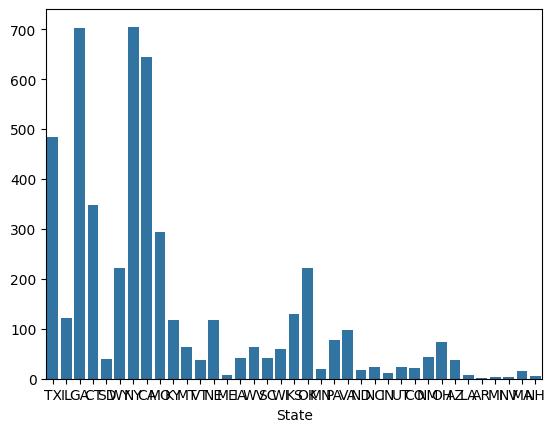

In [291]:
# Visualisation

sns.countplot(x="State", data=df_train)
plt.ylabel("")
plt.show()

In [292]:
# traitement des valeur manquantes

df_train.dropna(subset=["State"],axis=0 , inplace=True,ignore_index=True)
display ( df_train)

df_test.dropna(subset=["State"],axis=0 , inplace=True,ignore_index=True)
display ( df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,State,City_Density,Claim
0,1.0,1,1,0,1,1,0,1,0,0,0,0,1,0,TX,466.607387,non
1,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,IL,544.584670,non
2,1.0,1,0,1,0,0,0,0,1,0,1,0,0,4,GA,320.006933,oui
3,0.5,0,1,0,1,1,1,0,0,0,0,0,1,0,CT,646.406597,oui
4,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,SD,39.168800,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,1.0,0,1,0,1,1,1,0,0,0,0,1,0,0,GA,320.006933,oui
4939,0.5,0,0,1,0,0,0,1,0,1,0,0,0,4,NY,2141.604605,non
4940,1.0,1,0,1,0,0,1,0,0,0,0,1,0,3,CA,1306.829079,non
4941,0.5,0,0,1,0,0,1,0,0,1,0,0,0,4,OK,140.720934,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,State,City_Density,Claim
0,1.0,0,0,0,1,1,0,0,1,1,0,0,0,0,OH,374.595377,oui
1,1.0,0,0,1,0,0,0,1,0,1,0,0,0,5,ND,52.396649,non
2,1.0,1,0,1,0,0,0,0,1,0,0,1,0,6,CA,1306.829079,oui
3,1.0,0,1,0,1,1,0,0,1,0,1,0,0,0,NY,2141.604605,oui
4,0.5,0,0,1,0,0,0,0,1,1,0,0,0,9,VT,90.939623,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,0.5,1,0,1,0,0,0,1,0,0,0,0,1,2,CT,646.406597,non
2103,1.0,0,0,0,1,1,1,0,0,0,1,0,0,0,CT,646.406597,non
2104,1.0,0,0,1,0,0,0,1,0,0,1,0,0,3,NE,126.082765,non
2105,1.0,1,1,0,1,1,1,0,0,0,1,0,0,0,NE,126.082765,oui


In [293]:
# Label Encoading State
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train['State'] = encoder.fit_transform(df_train['State'])
df_test['State'] = encoder.fit_transform(df_test['State'])

## City_Density

In [294]:
# Analyse

print("Nomber of None Values = ",df_train['City_Density'].isna().sum())
display(df_train["City_Density"].describe())

print("Nomber of None Values = ",df_test['City_Density'].isna().sum())
display (df_test["City_Density"].describe())

Nomber of None Values =  0


,City_Density
count,4943.000000
mean,699.039287
std,696.478737
min,12.277654
25%,181.357874
50%,378.867996
75%,1306.829079
max,2141.604605


Nomber of None Values =  0


,City_Density
count,2107.000000
mean,731.164012
std,721.551352
min,12.277654
25%,181.357874
50%,466.607387
75%,1306.829079
max,2141.604605


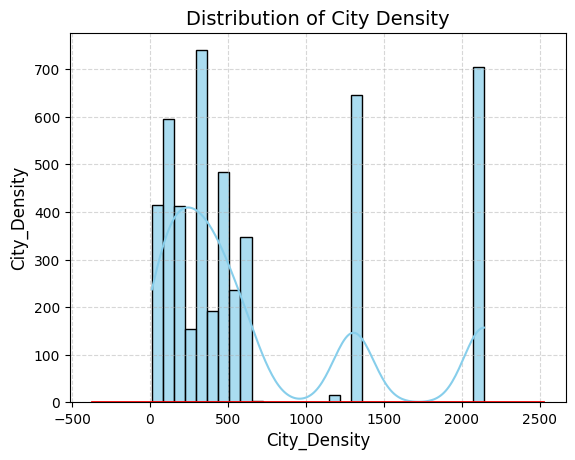

In [295]:
# Visualisation

sns.histplot(df_train["City_Density"], kde=True, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
sns.kdeplot(df_train["City_Density"], bw_method='scott', bw_adjust=1, color='red', linewidth=2)
plt.title("Distribution of City Density", fontsize=14)
plt.xlabel("City_Density", fontsize=12)
plt.ylabel("City_Density", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [296]:
#Astype

df_train ["City_Density"] = df_train["City_Density"].astype(int)
df_test ["City_Density"] = df_test["City_Density"].astype(int)

display(df_train)
display(df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,State,City_Density,Claim
0,1.0,1,1,0,1,1,0,1,0,0,0,0,1,0,30,466,non
1,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,7,544,non
2,1.0,1,0,1,0,0,0,0,1,0,1,0,0,4,5,320,oui
3,0.5,0,1,0,1,1,1,0,0,0,0,0,1,0,4,646,oui
4,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,29,39,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,1.0,0,1,0,1,1,1,0,0,0,0,1,0,0,5,320,oui
4939,0.5,0,0,1,0,0,0,1,0,1,0,0,0,4,24,2141,non
4940,1.0,1,0,1,0,0,1,0,0,0,0,1,0,3,2,1306,non
4941,0.5,0,0,1,0,0,1,0,0,1,0,0,0,4,26,140,non


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,State,City_Density,Claim
0,1.0,0,0,0,1,1,0,0,1,1,0,0,0,0,25,374,oui
1,1.0,0,0,1,0,0,0,1,0,1,0,0,0,5,19,52,non
2,1.0,1,0,1,0,0,0,0,1,0,0,1,0,6,2,1306,oui
3,1.0,0,1,0,1,1,0,0,1,0,1,0,0,0,24,2141,oui
4,0.5,0,0,1,0,0,0,0,1,1,0,0,0,9,33,90,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,0.5,1,0,1,0,0,0,1,0,0,0,0,1,2,4,646,non
2103,1.0,0,0,0,1,1,1,0,0,0,1,0,0,0,4,646,non
2104,1.0,0,0,1,0,0,0,1,0,0,1,0,0,3,20,126,non
2105,1.0,1,1,0,1,1,1,0,0,0,1,0,0,0,20,126,oui


## Claim

In [297]:
# Analyse

print("Nomber of None Values = ",df_train['Claim'].isna().sum())
display(df_train["Claim"].describe())

print("Nomber of None Values = ",df_test['Claim'].isna().sum())
display(df_test["Claim"].describe())

Nomber of None Values =  0


,Claim
count,4943
unique,2
top,non
freq,3837


Nomber of None Values =  0


,Claim
count,2107
unique,2
top,non
freq,1608


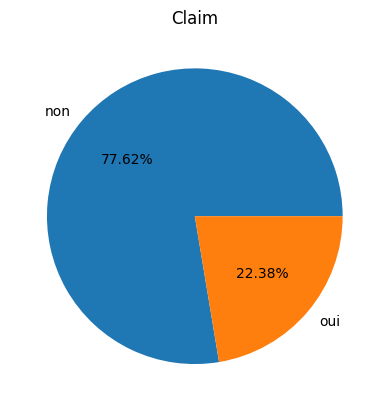

In [298]:
# Visualisation
Claim_counts=df_train['Claim'].value_counts()
labels=list(Claim_counts.index)
df_train['Claim'].value_counts().plot.pie(autopct='%1.2f%%',ylabel="",labels=labels,title='Claim')
plt.show()

In [299]:
# Binary Encoding

#(oui : Claim , non : Not Claim)
df_train ["Claim"].replace({"oui":1,"non":0},inplace=True)
df_test ["Claim"].replace({"oui":1,"non":0},inplace=True)
#(1 : Claim , 0 : Not Claim)
display(df_train)
display(df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,State,City_Density,Claim
0,1.0,1,1,0,1,1,0,1,0,0,0,0,1,0,30,466,0
1,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,7,544,0
2,1.0,1,0,1,0,0,0,0,1,0,1,0,0,4,5,320,1
3,0.5,0,1,0,1,1,1,0,0,0,0,0,1,0,4,646,1
4,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,29,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,1.0,0,1,0,1,1,1,0,0,0,0,1,0,0,5,320,1
4939,0.5,0,0,1,0,0,0,1,0,1,0,0,0,4,24,2141,0
4940,1.0,1,0,1,0,0,1,0,0,0,0,1,0,3,2,1306,0
4941,0.5,0,0,1,0,0,1,0,0,1,0,0,0,4,26,140,0


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,State,City_Density,Claim
0,1.0,0,0,0,1,1,0,0,1,1,0,0,0,0,25,374,1
1,1.0,0,0,1,0,0,0,1,0,1,0,0,0,5,19,52,0
2,1.0,1,0,1,0,0,0,0,1,0,0,1,0,6,2,1306,1
3,1.0,0,1,0,1,1,0,0,1,0,1,0,0,0,24,2141,1
4,0.5,0,0,1,0,0,0,0,1,1,0,0,0,9,33,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,0.5,1,0,1,0,0,0,1,0,0,0,0,1,2,4,646,0
2103,1.0,0,0,0,1,1,1,0,0,0,1,0,0,0,4,646,0
2104,1.0,0,0,1,0,0,0,1,0,0,1,0,0,3,20,126,0
2105,1.0,1,1,0,1,1,1,0,0,0,1,0,0,0,20,126,1


In [300]:
# Label Encoading State
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_train['State'] = encoder.fit_transform(df_train['State'])
df_test['State'] = encoder.fit_transform(df_test['State'])

# **Data Preprocessing (More Treatement)**

In [187]:
# Traitement des duplicata (lignes)

duplicated_df_train = df_train[df_train.duplicated()]
display(duplicated_df_train)

duplicated_df_test = df_test[df_test.duplicated()]
display (duplicated_df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,State,City_Density,Claim
58,1.0,1,1,0,1,1,0,1,0,0,0,0,1,0,30,466,0
87,1.0,0,0,0,1,1,1,0,0,1,0,0,0,0,10,161,0
91,1.0,1,1,0,1,1,0,1,0,0,0,0,1,0,30,466,1
103,1.0,1,1,0,1,1,0,1,0,0,0,0,1,0,30,466,0
127,1.0,0,1,0,1,1,1,0,0,0,1,0,0,0,24,2141,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,0.5,0,1,0,1,1,1,0,0,0,1,0,0,0,32,378,0
4938,1.0,0,1,0,1,1,1,0,0,0,0,1,0,0,5,320,1
4939,0.5,0,0,1,0,0,0,1,0,1,0,0,0,4,24,2141,0
4940,1.0,1,0,1,0,0,1,0,0,0,0,1,0,3,2,1306,0


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,State,City_Density,Claim
51,1.0,0,1,0,1,1,1,0,0,0,1,0,0,0,24,2141,0
58,1.0,0,1,0,1,1,1,0,0,0,1,0,0,0,24,2141,0
59,1.0,0,1,0,1,1,0,0,1,0,1,0,0,0,24,2141,1
76,1.0,0,0,0,1,1,1,0,0,0,0,1,0,0,2,1306,0
84,0.5,0,0,0,1,1,0,1,0,0,1,0,0,0,36,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,1.0,0,0,0,1,1,1,0,0,0,1,0,0,0,7,544,0
2098,1.0,1,0,1,0,0,0,0,1,0,0,1,0,5,2,1306,1
2099,1.0,0,0,1,0,0,1,0,0,0,0,1,0,4,2,1306,0
2104,1.0,0,0,1,0,0,0,1,0,0,1,0,0,3,20,126,0


In [188]:
df_train.drop_duplicates(inplace=True, ignore_index=True)
df_test.drop_duplicates(inplace=True, ignore_index=True)

In [189]:
# Réinitialisation de l’index des lignes

df_train.reset_index(drop = True, inplace=True)
df_test.reset_index(drop = True, inplace=True)

display(df_train)
display(df_test)

,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,State,City_Density,Claim
0,1.0,1,1,0,1,1,0,1,0,0,0,0,1,0,30,466,0
1,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,7,544,0
2,1.0,1,0,1,0,0,0,0,1,0,1,0,0,4,5,320,1
3,0.5,0,1,0,1,1,1,0,0,0,0,0,1,0,4,646,1
4,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,29,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,1,0,1,0,0,0,0,1,1,0,0,0,10,25,374,0
2120,1.0,0,0,1,0,0,0,0,1,1,0,0,0,6,24,2141,1
2121,1.0,0,0,1,0,0,0,1,0,0,0,0,1,3,4,646,1
2122,1.0,1,0,0,1,1,0,1,0,0,0,1,0,0,36,12,0


,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,urbain_zone,Small_Building,Medium_Building,Large_Building,Building_Type_Fire-resistive,Building_Type_Non-combustible,Building_Type_Ordinary,Building_Type_Wood-framed,NumberOfWindows,State,City_Density,Claim
0,1.0,0,0,0,1,1,0,0,1,1,0,0,0,0,25,374,1
1,1.0,0,0,1,0,0,0,1,0,1,0,0,0,5,19,52,0
2,1.0,1,0,1,0,0,0,0,1,0,0,1,0,6,2,1306,1
3,1.0,0,1,0,1,1,0,0,1,0,1,0,0,0,24,2141,1
4,0.5,0,0,1,0,0,0,0,1,1,0,0,0,9,33,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1.0,0,0,1,0,0,0,0,1,0,1,0,0,4,20,126,0
1222,0.5,0,0,1,0,0,1,0,0,1,0,0,0,4,27,533,0
1223,0.5,1,0,1,0,0,0,1,0,0,0,0,1,2,4,646,0
1224,1.0,0,0,0,1,1,1,0,0,0,1,0,0,0,4,646,0



# **Data Splitting X/Y, Model training and Validation**



## **Data Splitting X/Y**

In [191]:
X_train = df_train.iloc[:, :-1].values
Y_train = df_train.iloc[:, -1].values
X_test = df_test.iloc[:, :-1].values
Y_test = df_test.iloc[:, -1].values

## Applying SMOTE To Treat Unbalanced Data (Make Claims Equal)

In [192]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, Y_train)

## **Decision Tree Classifier**

In [193]:
# Train the decision tree classifier
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=2)

## **SVC**

In [194]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train_smote, y_train_smote)

SVC(probability=True)

## **MLPClassifier**

In [195]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500)
mlp.fit(X_train_smote, y_train_smote)

MLPClassifier(max_iter=500)

## GradientTreeBoosting

> [Ajouter une citation](https://)



In [196]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier()

## RandomForestClassifier

In [197]:
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

# **Evaluation of model performance**

## Evaluation Function

In [198]:
def ev_model(cls, x, y):
  # Predictions
  y_pred = cls.predict(x)
  y_pred_proba = cls.predict_proba(x)[:, 1] # Positive Class Predictions

  accuracy = accuracy_score(y, y_pred)
  f1_scoree = f1_score(y, y_pred)
  area_under_curve = roc_auc_score(y, y_pred_proba)

  print(f"Accuracy: {accuracy:.2f}")
  print(f"F1 Score: {f1_scoree:.2f}")
  print(f"Area Under Curve: {area_under_curve:.2f}")
  print(classification_report(y, y_pred))

  # Confusion Matrix
  conf_matrix = confusion_matrix(y, y_pred)
  plt.figure(figsize=(8, 5))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.title('Confusion Matrix' + cls.__class__.__name__)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  # ROC
  fpr, tpr, threshholds = roc_curve(y, y_pred_proba)
  plt.figure(figsize=(8, 5))
  plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {area_under_curve:.2f})")
  plt.plot([0, 1], [0,1], color="yellow")
  plt.title("ROC Curve" + cls.__class__.__name__)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.show()

  return None

## Decision Tree Classifier

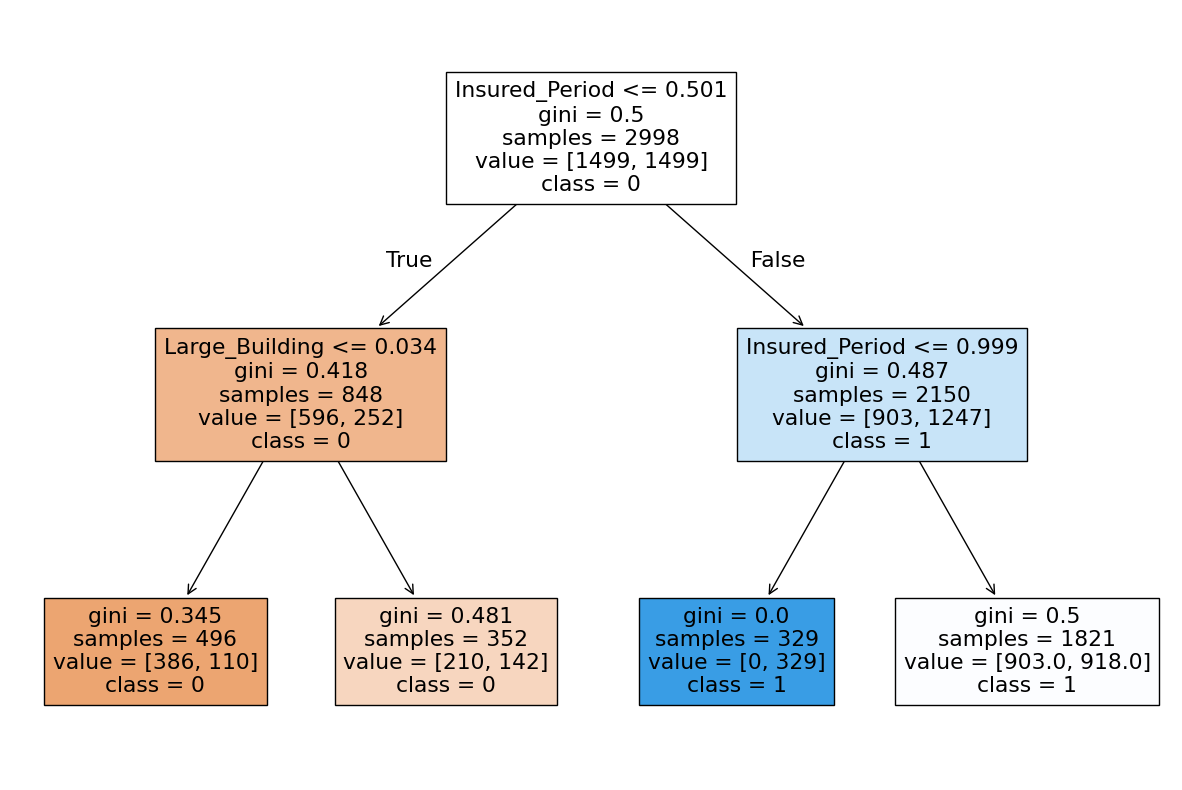

|--- Insured_Period <= 0.50
|   |--- Large_Building <= 0.03
|   |   |--- class: 0
|   |--- Large_Building >  0.03
|   |   |--- class: 0
|--- Insured_Period >  0.50
|   |--- Insured_Period <= 1.00
|   |   |--- class: 1
|   |--- Insured_Period >  1.00
|   |   |--- class: 1



In [199]:
# Visualize the decision tree
fig = plt.figure(figsize=(15, 10))
plot_tree(dtc, feature_names=list(df_train)[:-1], class_names=[str(cls_class) for cls_class in dtc.classes_], filled=True)
plt.show()
# Export text representation of the decision tree
print(export_text(dtc, feature_names=list(df_train)[:-1]))

'Train Set Evaluation For DecisionTreeClassifier'

Accuracy: 0.49
F1 Score: 0.45
Area Under Curve: 0.56
              precision    recall  f1-score   support

           0       0.77      0.40      0.52      1499
           1       0.33      0.71      0.45       625

    accuracy                           0.49      2124
   macro avg       0.55      0.56      0.49      2124
weighted avg       0.64      0.49      0.50      2124



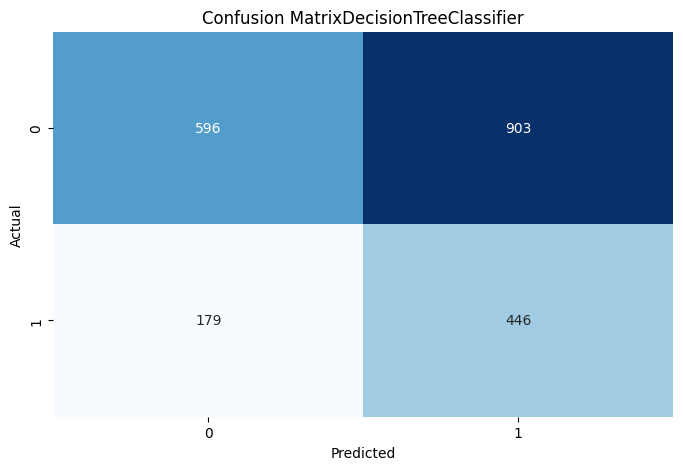

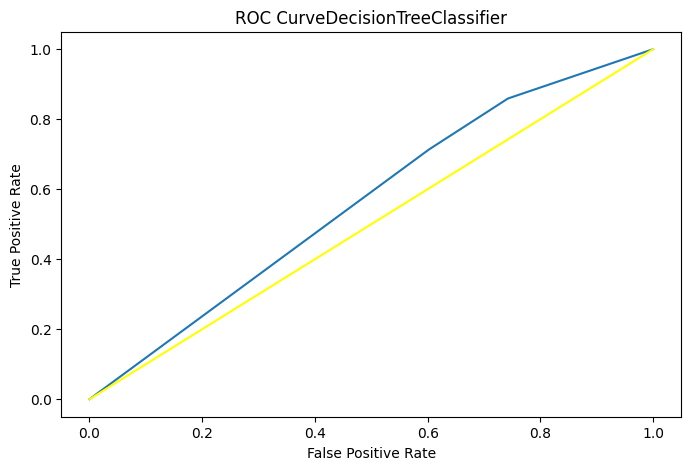

'Test Set Evaluation ForDecisionTreeClassifier'

Accuracy: 0.44
F1 Score: 0.42
Area Under Curve: 0.55
              precision    recall  f1-score   support

           0       0.77      0.33      0.46       892
           1       0.29      0.75      0.42       334

    accuracy                           0.44      1226
   macro avg       0.53      0.54      0.44      1226
weighted avg       0.64      0.44      0.45      1226



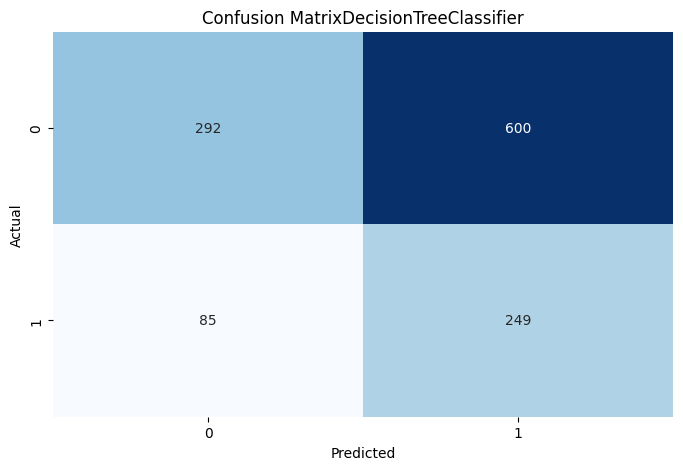

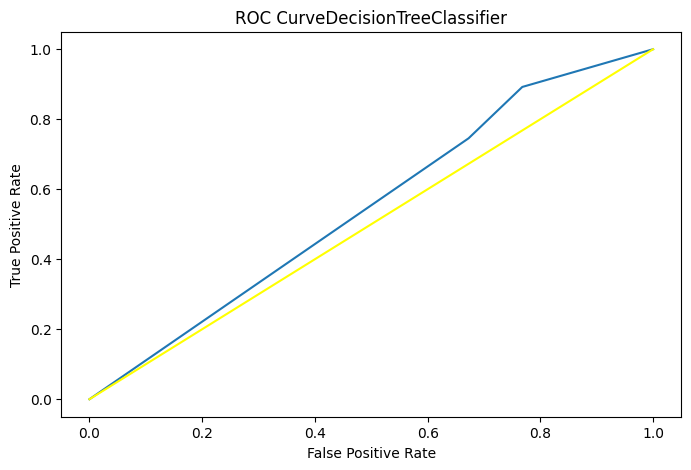

In [200]:
display("Train Set Evaluation For " + dtc.__class__.__name__)
ev_model(dtc, X_train, Y_train)
display("Test Set Evaluation For" + dtc.__class__.__name__)
ev_model(dtc, X_test, Y_test)

## SVC (Support Vector Classifier)

'Train Set Evaluation For SVC'

Accuracy: 0.57
F1 Score: 0.39
Area Under Curve: 0.56
              precision    recall  f1-score   support

           0       0.74      0.61      0.67      1499
           1       0.34      0.47      0.39       625

    accuracy                           0.57      2124
   macro avg       0.54      0.54      0.53      2124
weighted avg       0.62      0.57      0.59      2124



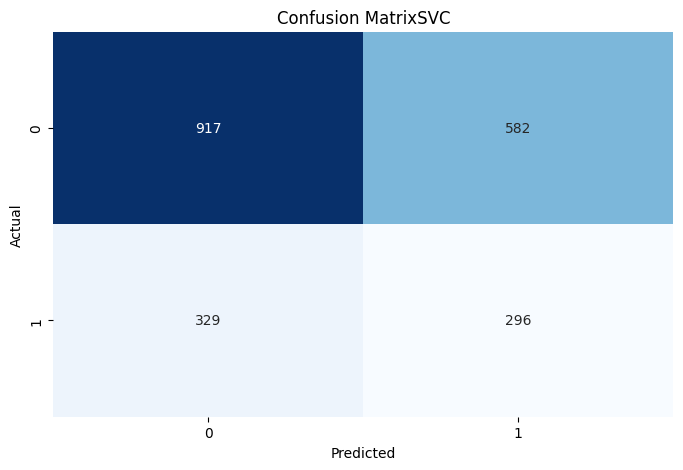

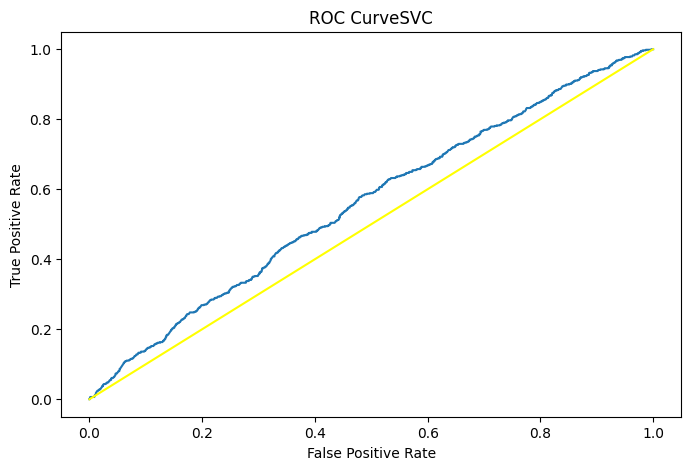

'Test Set Evaluation ForSVC'

Accuracy: 0.54
F1 Score: 0.36
Area Under Curve: 0.54
              precision    recall  f1-score   support

           0       0.74      0.57      0.64       892
           1       0.29      0.48      0.36       334

    accuracy                           0.54      1226
   macro avg       0.52      0.52      0.50      1226
weighted avg       0.62      0.54      0.57      1226



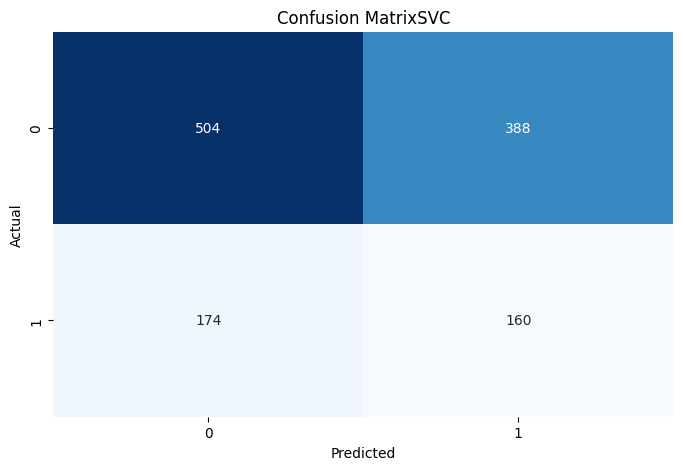

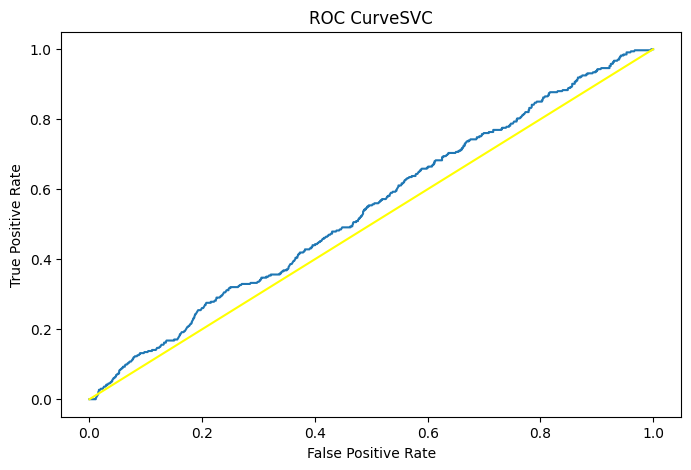

In [202]:
display("Train Set Evaluation For " + svc.__class__.__name__)
ev_model(svc, X_train, Y_train)
display("Test Set Evaluation For" + svc.__class__.__name__)
ev_model(svc, X_test, Y_test)

## MLPClassifier

'Train Set Evaluation For MLPClassifier'

Accuracy: 0.63
F1 Score: 0.43
Area Under Curve: 0.62
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1499
           1       0.40      0.48      0.43       625

    accuracy                           0.63      2124
   macro avg       0.58      0.59      0.58      2124
weighted avg       0.65      0.63      0.64      2124



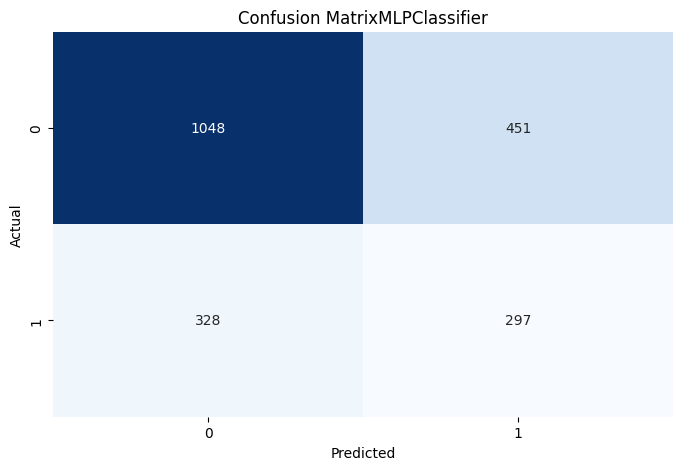

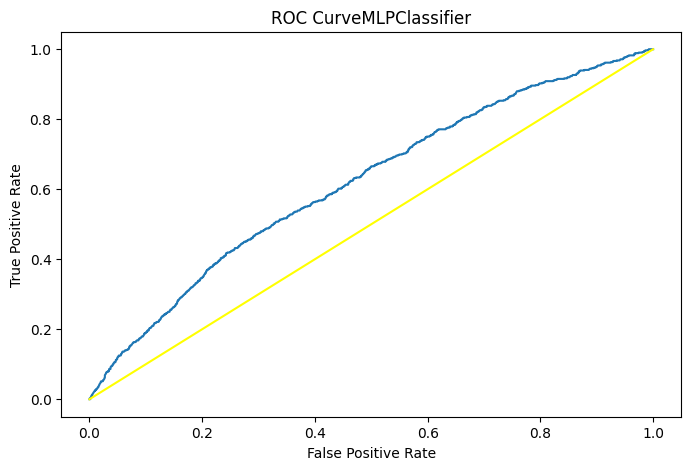

'Test Set Evaluation ForMLPClassifier'

Accuracy: 0.65
F1 Score: 0.44
Area Under Curve: 0.64
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       892
           1       0.39      0.50      0.44       334

    accuracy                           0.65      1226
   macro avg       0.59      0.60      0.59      1226
weighted avg       0.68      0.65      0.66      1226



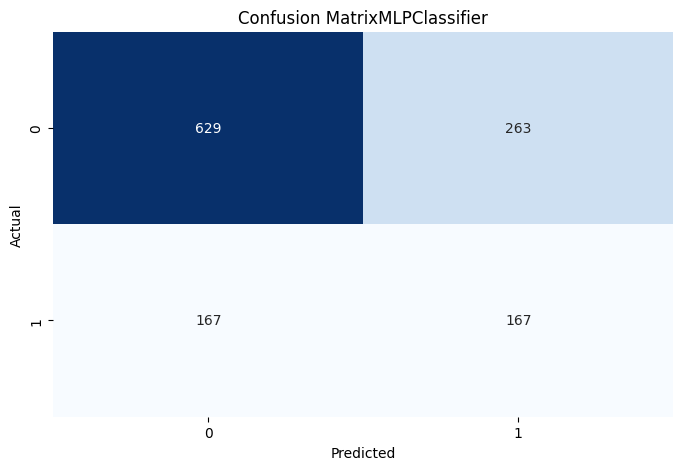

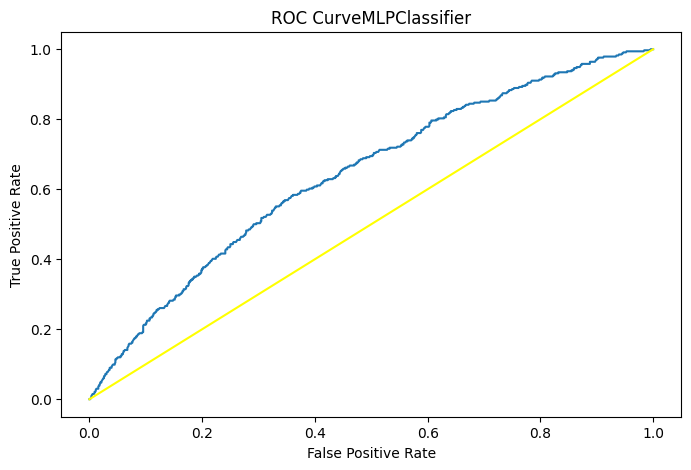

In [203]:
display("Train Set Evaluation For " + mlp.__class__.__name__)
ev_model(mlp, X_train, Y_train)
display("Test Set Evaluation For" + mlp.__class__.__name__)
ev_model(mlp, X_test, Y_test)

## Gradient Boosting

'Train Set Evaluation For GradientBoostingClassifier'

Accuracy: 0.72
F1 Score: 0.34
Area Under Curve: 0.69
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1499
           1       0.54      0.24      0.34       625

    accuracy                           0.72      2124
   macro avg       0.64      0.58      0.58      2124
weighted avg       0.68      0.72      0.68      2124



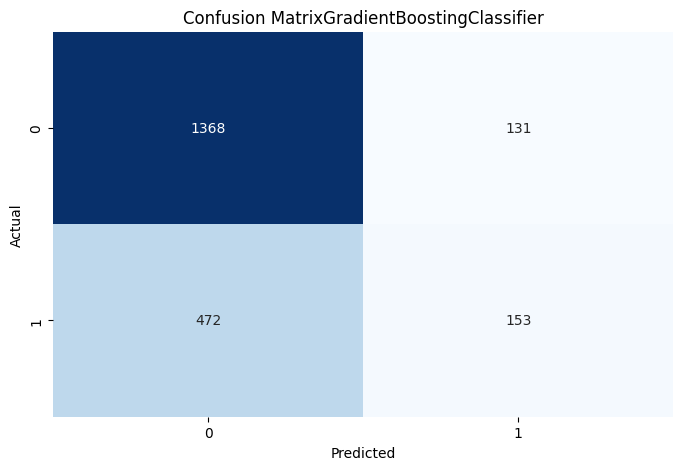

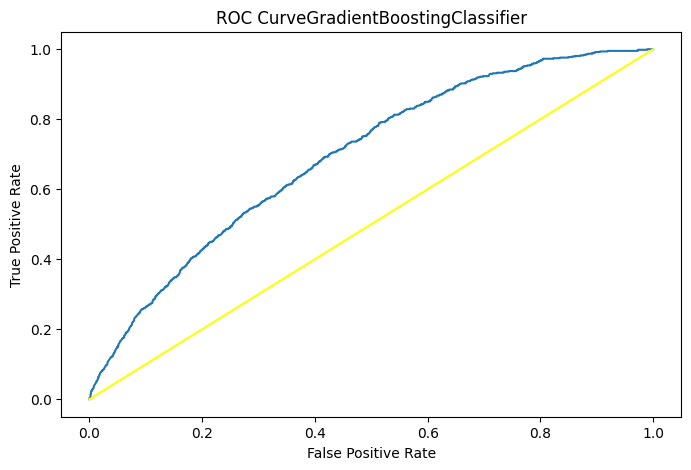

'Test Set Evaluation ForGradientBoostingClassifier'

Accuracy: 0.72
F1 Score: 0.33
Area Under Curve: 0.67
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       892
           1       0.47      0.25      0.33       334

    accuracy                           0.72      1226
   macro avg       0.61      0.57      0.57      1226
weighted avg       0.68      0.72      0.69      1226



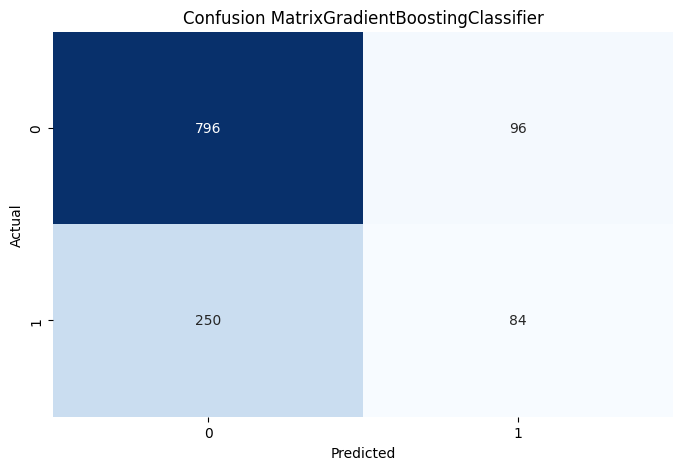

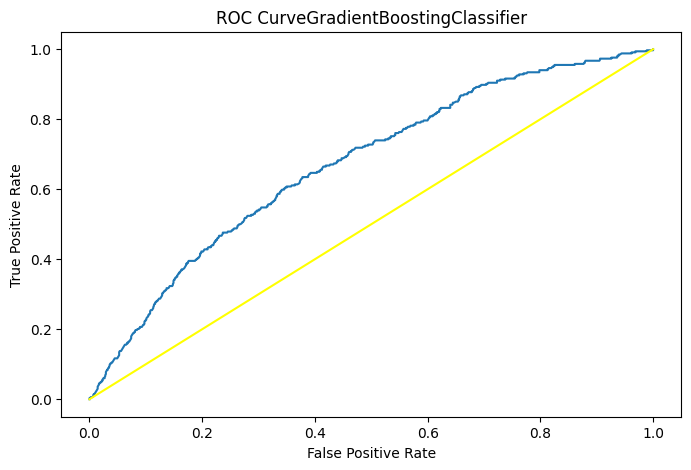

In [204]:
display("Train Set Evaluation For " + gb.__class__.__name__)
ev_model(gb, X_train, Y_train)
display("Test Set Evaluation For" + gb.__class__.__name__)
ev_model(gb, X_test, Y_test)

## RandomForestClassifier

'Train Set Evaluation For RandomForestClassifier'

Accuracy: 0.79
F1 Score: 0.62
Area Under Curve: 0.89
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1499
           1       0.67      0.58      0.62       625

    accuracy                           0.79      2124
   macro avg       0.75      0.73      0.74      2124
weighted avg       0.78      0.79      0.79      2124



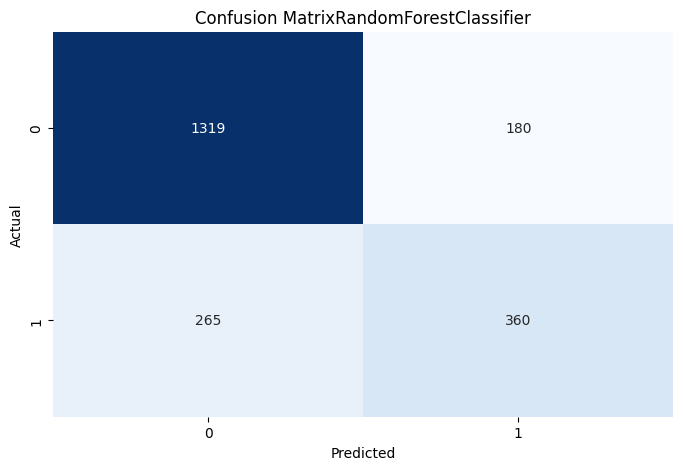

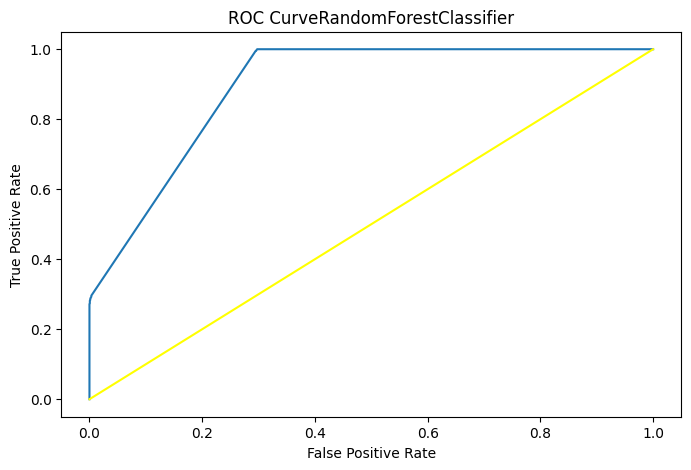

'Test Set Evaluation ForRandomForestClassifier'

Accuracy: 0.68
F1 Score: 0.37
Area Under Curve: 0.63
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       892
           1       0.40      0.34      0.37       334

    accuracy                           0.68      1226
   macro avg       0.58      0.57      0.58      1226
weighted avg       0.67      0.68      0.67      1226



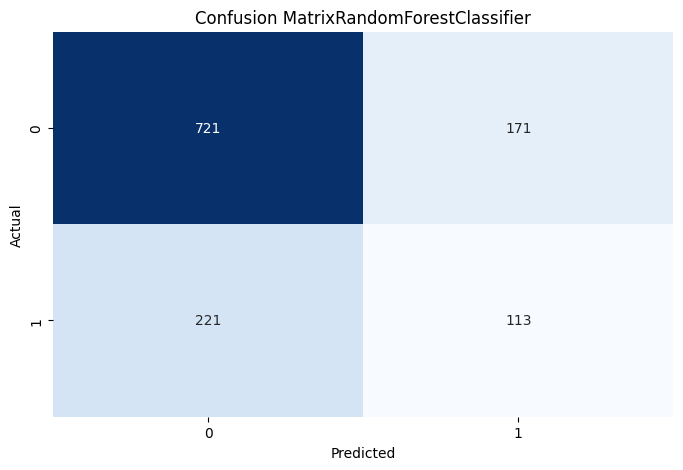

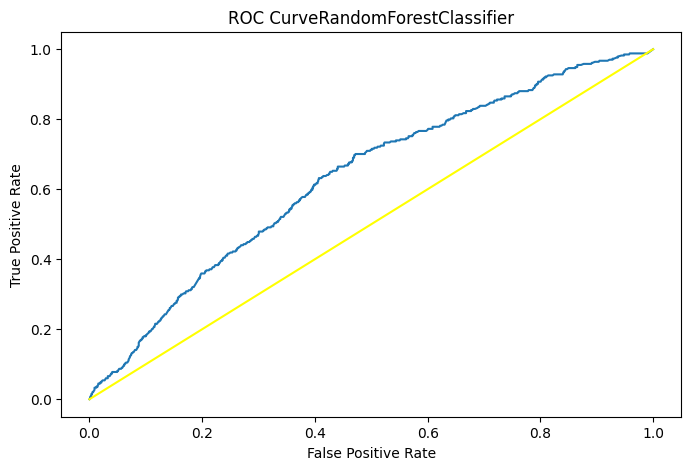

In [205]:
display("Train Set Evaluation For " + rf.__class__.__name__)
ev_model(rf, X_train, Y_train)
display("Test Set Evaluation For" + rf.__class__.__name__)
ev_model(rf, X_test, Y_test)